# AUTOMATED CARS, SAFETY AND EFFICIENCY



## Overview

Automated cars are becoming a more prevalent phenomena on modern day cities, however, their potential may also be questioned as to how reliable and safe they are to become a better option than current day human driven cars. The purpose of this project is to evaluate how safe are automated cars and if they can be a viable solution for being used in big cities.

### 1. Align on Business Understanding 
- Evaluate safety
- Utilize data to recommend increasing their use
        
### 2. Data Analysis
- Find whether or not humans will crash more often than automated cars
- Analyze car accidents data sets
    
### 3. Recommendations
- Define three recommendations to move forward in the film industry
- Use data findings to support recommendations
- Identify next steps for Computing Vision appliances between automated cars


In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Datasets related to car accidents, autonomous and non-autonomous cars

This dataset reports car crashes during a certain time and if they were autonomously driven or not. ADAS represents not fully autonomous cars, while ADS represents fully autonomously driven cars.

In [152]:
df1 = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_ADAS.csv',
                 parse_dates=['Report Submission Date'])

df2 = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_ADS.csv',
                 parse_dates=['Report Submission Date'])

df3 = pd.read_csv('data/Automated_Driving_Crashes_Dataset/SGO-2021-01_Incident_Reports_OTHER.csv',
                 parse_dates=['Report Submission Date'])

#### Dataset Cleaning

Cleaning the dataset for ADAS

In [153]:
#df1.drop(['SV Contact Area - Right', 'SV Contact Area - Front Right', 'SV Contact Area - Bottom', 'SV Contact Area - Unknown', 'Model Year - Unknown', 'Investigating Agency', 'Data Availability - Police Rpt', 'Inv. Officer Phone - Unknown', 'Rep Ent Or Mfr Investigating?', 'Report Month', 'Data Availability - No Data', 'Report Version', 'Inv. Officer Email - Unknown', 'Investigating Officer Email', 'Investigating Agency - Unknown', 'Data Availability - Unknown', 'Law Enforcement Investigating?', 'Report Year', 'Serial Number', 'VIN - Unknown', 'Investigating Officer Name', 'Inv. Officer Name - Unknown', 'Investigating Officer Phone'], axis=1)
df1 = df1[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State']]
i = df1[(df1.VIN.isna())].index
df1['Mileage'] = df1['Mileage'].fillna('Unregistered')
df1['Level_of_Driving_Automation'] = 'ADAS'
df1 = df1.drop(i)

# RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
df1['Report_Submission_Date'] = df1['Report Submission Date']
df1['Report_ID'] = df1['Report ID']
df1['Model_Year'] = df1['Model Year']

df1= df1[['Report_ID', 'VIN', 'Report_Submission_Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]

df1= df1[['Report_ID', 'VIN', 'Report_Submission_Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
df1

,Report_ID,VIN,Report_Submission_Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
0,1306-3711,JTDEPMAE0MJ,2022-09-01,Toyota,Corolla,2021,13954.0,NC,ADAS
1,13781-3765,5YJSA1E57NF,2022-09-01,Tesla,Model S,2022,4849.0,CA,ADAS
2,13781-3745,7SAYGDEE7NF,2022-09-01,Tesla,Model Y,2022,1281.0,PA,ADAS
3,13781-3742,5YJYGDEE4LF,2022-09-01,Tesla,Model Y,2020,57537.0,WI,ADAS
4,13781-3743,5YJ3E1EAXKF,2022-09-01,Tesla,Model 3,2019,75581.0,NC,ADAS
...,...,...,...,...,...,...,...,...,...
1162,13781-21,5YJYGDEEXMF,2021-07-01,Tesla,Model Y,2021,Unregistered,NY,ADAS
1163,13781-19,5YJYGDEE0LF,2021-07-01,Tesla,Model Y,2020,14365.0,CA,ADAS
1164,13781-14,5YJ3E1EB7LF,2021-07-01,Tesla,Model 3,2020,41096.0,TX,ADAS
1165,13781-13,5YJ3E1EB0MF,2021-07-01,Tesla,Model 3,2021,442.0,CA,ADAS


Cleaning the dataset for ADS

In [154]:
df2 = df2[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State']]
i = df2[(df2.VIN.isna())].index
df2 = df2.drop(i)
df2['Mileage'] = df2['Mileage'].fillna('Unregistered')
df2['Level_of_Driving_Automation'] = 'ADS'

#RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
df2['Report_Submission_Date'] = df2['Report Submission Date']
df2['Report_ID'] = df2['Report ID']
df2['Model_Year'] = df2['Model Year']

i = df2[(df2.Model_Year.isna())].index
df2 = df2.drop(i)
df2.drop(['Report Submission Date', 'Report ID', 'Model Year'], axis=1)

df2= df2[['Report_ID', 'VIN', 'Report_Submission_Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
df2

,Report_ID,VIN,Report_Submission_Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
0,30531-3884,SADHW2S18M1,2022-09-01,Jaguar,I-Pace,2021.0,28679.0,CA,ADS
1,30531-3883,SADHW2S11M1,2022-09-01,Jaguar,I-Pace,2021.0,44439.0,AZ,ADS
2,30531-3882,1XPBD49XXMD,2022-09-01,Peterbilt,579 Epiq,2021.0,194446.0,TX,ADS
3,30531-3881,SADHW2S15M1,2022-09-01,Jaguar,I-Pace,2021.0,10537.0,CA,ADS
4,30531-3880,SADHW2S19M1,2022-09-01,Jaguar,I-Pace,2021.0,17214.0,CA,ADS
...,...,...,...,...,...,...,...,...,...
431,30270-1,2C4RC1K76HR,2021-07-01,Chrysler,Pacifica,2017.0,34996.0,CA,ADS
432,30531-6,SADHW2S14M1,2021-07-01,Jaguar,I-Pace,2021.0,1232.0,CA,ADS
433,30270-4,SADHW2S14M1,2021-07-01,Jaguar,I-Pace,2021.0,1232.0,CA,ADS
434,30531-2,2C4RC1K76HR,2021-07-01,Chrysler,Pacifica,2017.0,34996.0,CA,ADS


Cleaning the dataset for other

In [176]:
#df1.drop(['SV Contact Area - Right', 'SV Contact Area - Front Right', 'SV Contact Area - Bottom', 'SV Contact Area - Unknown', 'Model Year - Unknown', 'Investigating Agency', 'Data Availability - Police Rpt', 'Inv. Officer Phone - Unknown', 'Rep Ent Or Mfr Investigating?', 'Report Month', 'Data Availability - No Data', 'Report Version', 'Inv. Officer Email - Unknown', 'Investigating Officer Email', 'Investigating Agency - Unknown', 'Data Availability - Unknown', 'Law Enforcement Investigating?', 'Report Year', 'Serial Number', 'VIN - Unknown', 'Investigating Officer Name', 'Inv. Officer Name - Unknown', 'Investigating Officer Phone'], axis=1)
df3 = df3[['Report ID', 'VIN', 'Make', 'Report Submission Date', 'Model', 'Model Year', 'Mileage', 'State', 'Report Type']]
df3['Report_Type'] = df3['Report Type']
df3 = df3[df3['Report_Type'] != 'Monthly - No Incidents']

i = df3[(df3.VIN.isna())].index
df3['Mileage'] = df3['Mileage'].fillna('Unregistered')
df3['State'] = df3['State'].fillna('Unregistered')
df3['Level_of_Driving_Automation'] = 'Other'
df3 = df3.drop(i)

#df3.isna().sum()
# RENAMING COLUMNS FOR NAMES WITHOUT SPACES FOR COMPATIBILITY ISSUES
df3['Report_Submission_Date'] = df3['Report Submission Date']
df3['Report_ID'] = df3['Report ID']

df3['Model_Year'] = df3['Model Year']


df3= df3[['Report_ID', 'VIN', 'Report_Submission_Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
df3= df3[['Report_ID', 'VIN', 'Report_Submission_Date', 'Make', 'Model', 'Model_Year', 'Mileage', 'State', 'Level_of_Driving_Automation']]
#df3.Report_Type.unique()
df3

,Report_ID,VIN,Report_Submission_Date,Make,Model,Model_Year,Mileage,State,Level_of_Driving_Automation
152,30531-3328,SADHW2S15M1,2022-07-01,Jaguar,I-Pace,2021.0,23192.0,CA,Other
153,30531-3329,SADHW2S11M1,2022-07-01,Jaguar,I-Pace,2021.0,28219.0,AZ,Other
216,30531-3329,SADHW2S11M1,2022-07-01,Jaguar,I-Pace,2021.0,28219.0,AZ,Other
217,30531-3328,SADHW2S15M1,2022-07-01,Jaguar,I-Pace,2021.0,23192.0,CA,Other
290,30531-3063,SADHW2S15M1,2022-06-01,Jaguar,I-Pace,2021.0,32794.0,AZ,Other
...,...,...,...,...,...,...,...,...,...
1162,540-1147,5G21A6P07L4,2021-08-01,Chevrolet,Bolt,2020.0,31090.0,CA,Other
1164,540-1136,1G6KP5R60JU,2021-08-01,Cadillac,CT6,2018.0,Unregistered,TX,Other
1181,753-1115,5XXG34J24MG,2021-08-01,KIA,K5,2021.0,Unregistered,FL,Other
1243,540-20,5G21A6P01L4,2021-08-01,Cruise,AV,2020.0,31980.0,Unregistered,Other


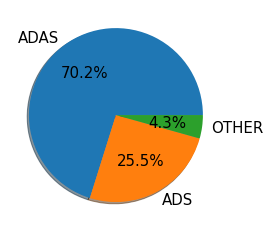

In [177]:
#plot the distribution
x1 = len(df1)
x2 = len(df2)
x3 = len(df3)
x = [x1, x2, x3]
y = ["ADAS", "ADS", "OTHER"]
c = ["b", "r"]
#data = [44, 45, 40, 41, 39]
#keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']
plt.pie(x, labels = y, radius = 1, autopct = "%0.1f%%", shadow = True, labeldistance = 1.1, startangle = 0, textprops = {"fontsize": 15})
#plt.pie(colors ="w")
plt.show()
#x

### Comparing Statistical Data

#### Linear Regression

##### Covariance

### Logistical Regression

Will accidents be from human or robot origin?

In [17]:
# This dataset is yet to be processed as it's image related and will be added additionally as a solution

### Random Forest